Plotting Exo2 data as a function of light intensity. Will perform cross correlation analysis because parameter responses show a time lag. Data collected using YSI Exo2 sonde in Stephens Lake in Franklin, TN in April 2023.

In [1]:
import pandas as pd

# Load the data
file_path = 'Exo2Data_040323.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

,DateTime,Light_lux,Temp_C,Chlorophyll_RFU,Depth_m,fDOM_RFU,ODO_mg_L,SpCond_uS_cm,TAL_PC_RFU,pH,Turbidity_FNU
0,3/27/2023 16:30,5173.76,19.194,0.45,0.411,7.42,9.98,120.3,0.29,7.55,2.96
1,3/27/2023 16:35,5335.04,19.131,0.40,0.391,7.52,10.04,120.4,0.24,7.54,2.59
2,3/27/2023 16:40,3784.96,19.114,0.49,0.391,7.60,10.01,120.6,0.29,7.51,1.69
3,3/27/2023 16:45,8140.80,19.212,0.37,0.392,7.48,10.22,120.4,0.29,7.56,1.81
4,3/27/2023 16:50,6548.48,19.373,0.32,0.392,7.29,10.59,120.9,0.23,7.69,1.27


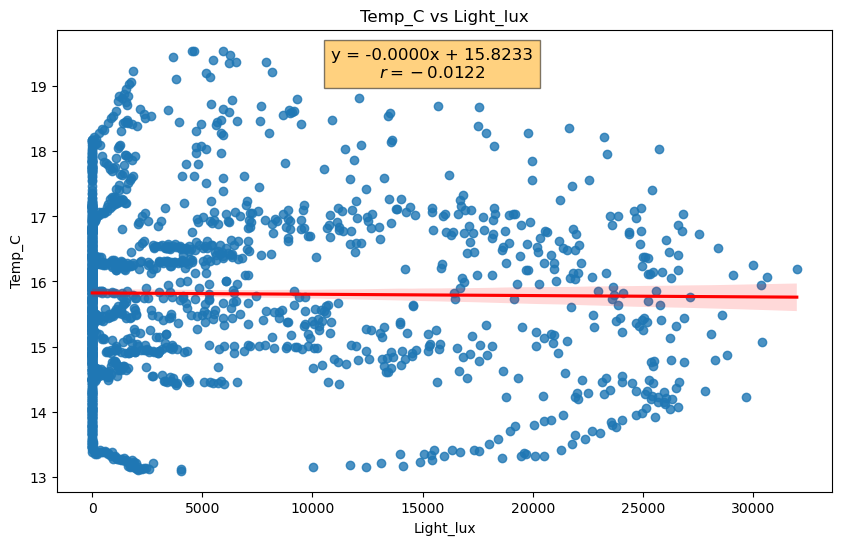

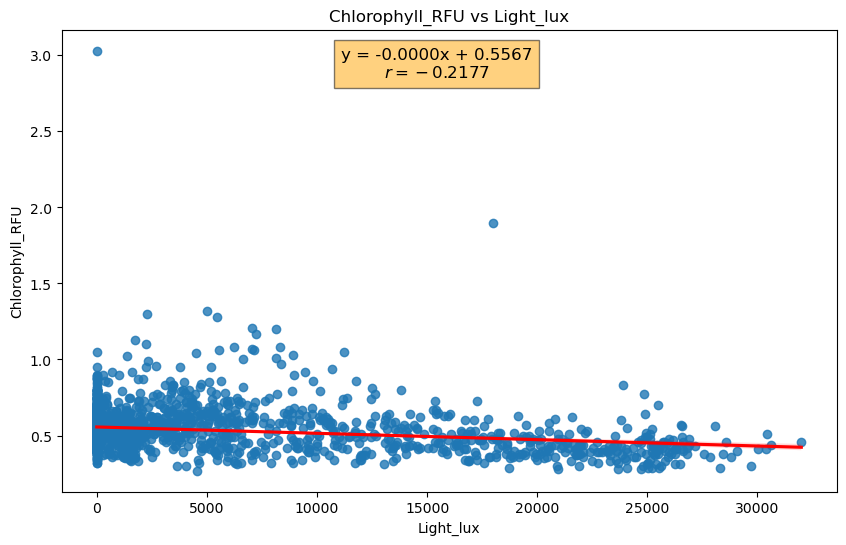

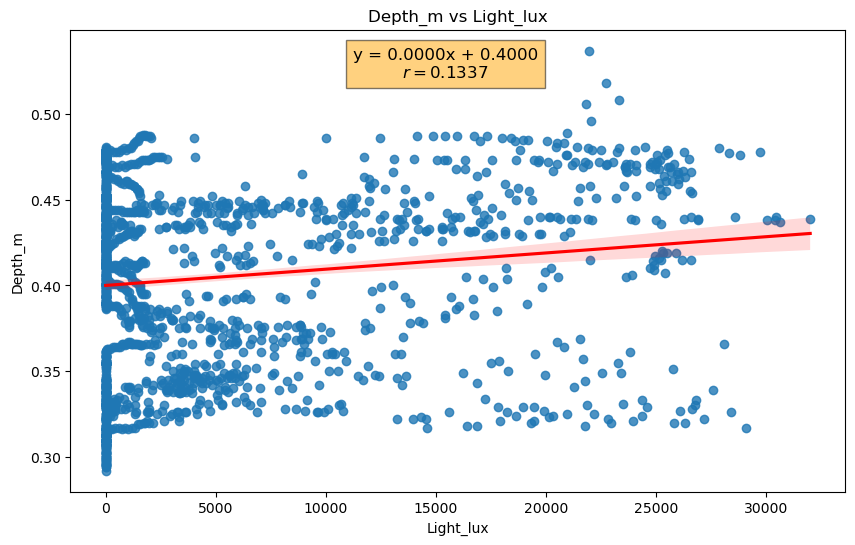

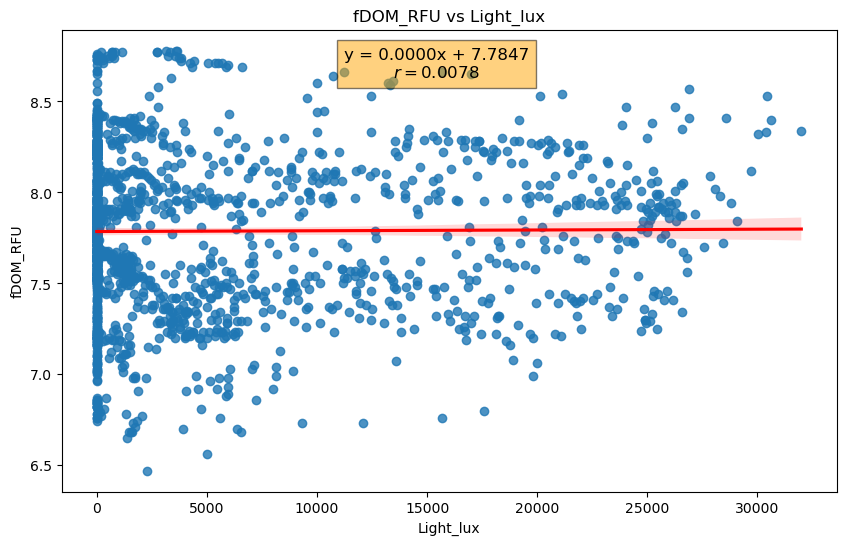

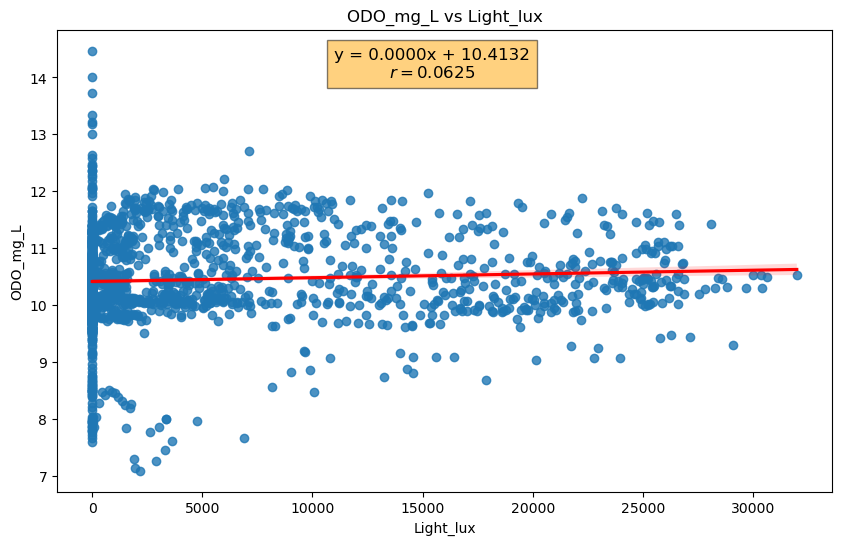

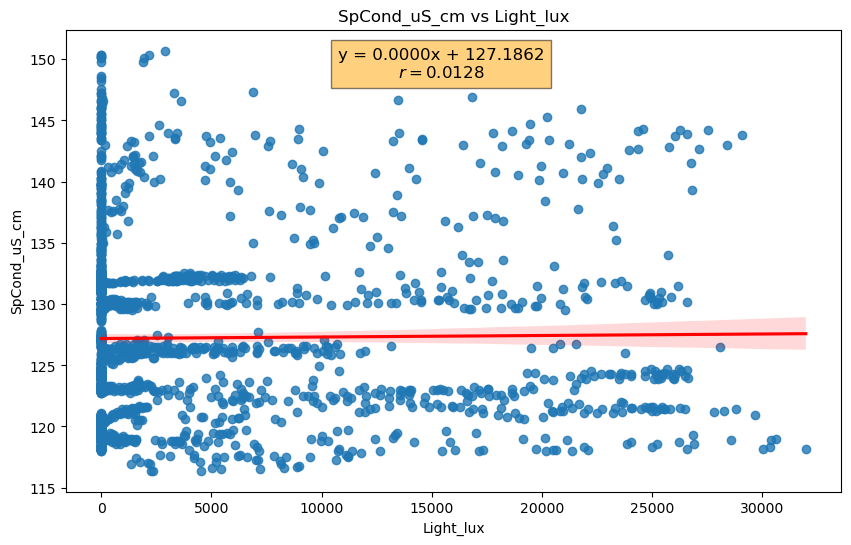

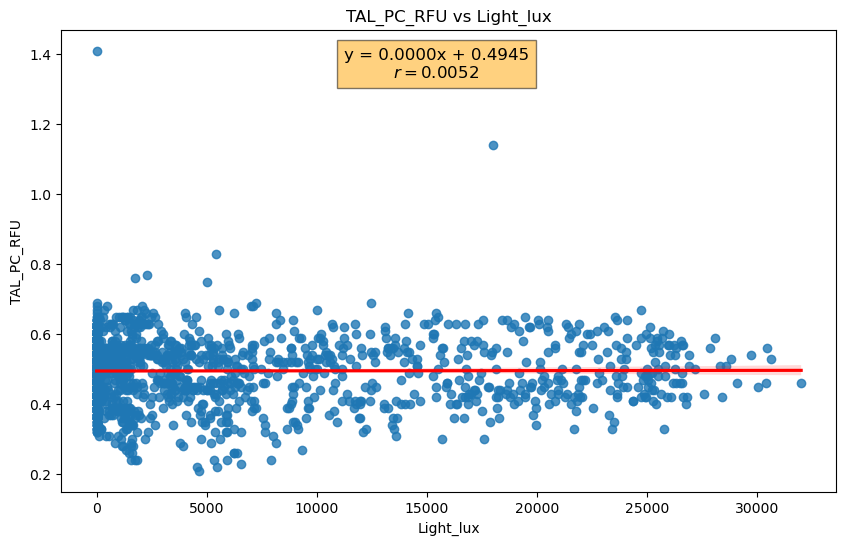

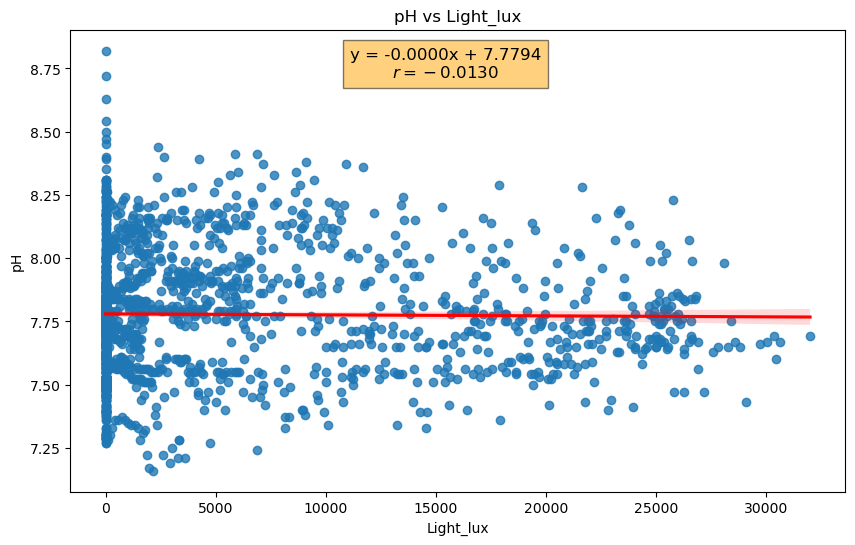

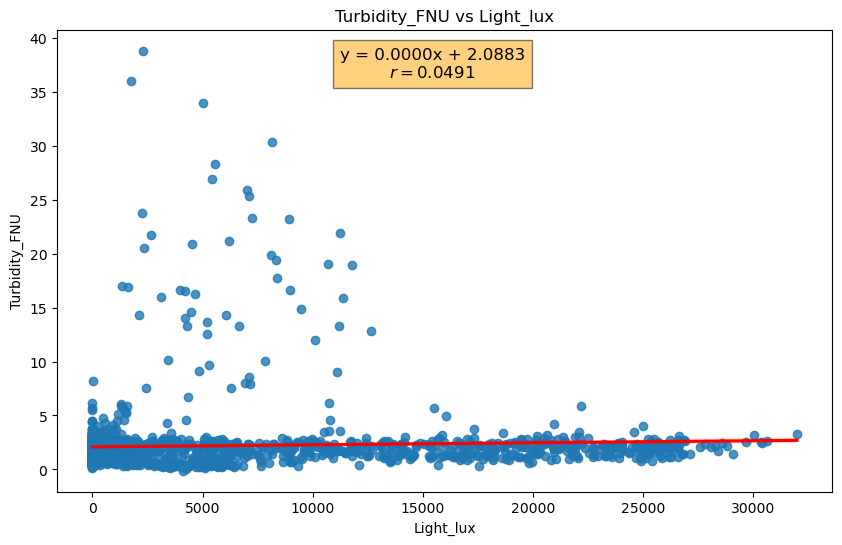

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import os

# Create a directory for the PNG files
plots_directory = 'light_lux_plots'
os.makedirs(plots_directory, exist_ok=True)

# Variables to be plotted against Light_lux
variables = ['Temp_C', 'Chlorophyll_RFU', 'Depth_m', 'fDOM_RFU', 'ODO_mg_L',
             'SpCond_uS_cm', 'TAL_PC_RFU', 'pH', 'Turbidity_FNU']

# Function to create plots with linear regression
def create_plot(x, y, data, var_name):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(data[x], data[y])
    
    # Create scatter plot and line of best fit
    plt.figure(figsize=(10, 6))
    sns.regplot(x=x, y=y, data=data, line_kws={"color": "red"})
    
    # Annotate with the regression equation and the correlation coefficient
    plt.title(f"{var_name} vs Light_lux")
    plt.xlabel('Light_lux')
    plt.ylabel(var_name)
    plt.figtext(0.5, 0.8, f"y = {slope:.4f}x + {intercept:.4f}\n$r = {r_value:.4f}$", 
                ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})

    # Save the plot as a PNG file
    # plot_filename = f"{plots_directory}/Light_lux_vs_{var_name}.png"
    # plt.savefig(plot_filename)
    plt.show()
    # plt.close()  # Close the figure to avoid displaying it in the notebook
    # return plot_filename

# Create and save plots for each variable
# plot_files = [create_plot('Light_lux', var, data, var) for var in variables]

# Confirm the saved plot files
# plot_files


Test for cross correlation for each series for different lags of light_lux.  Plot cross-correlation coefficients for each series.

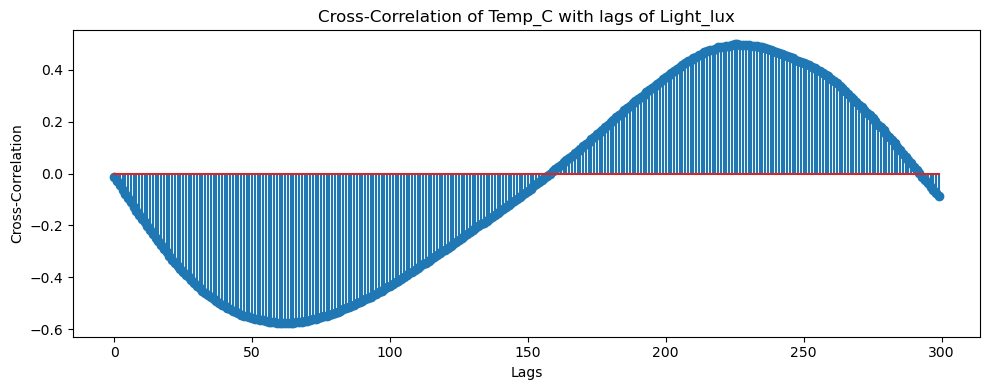

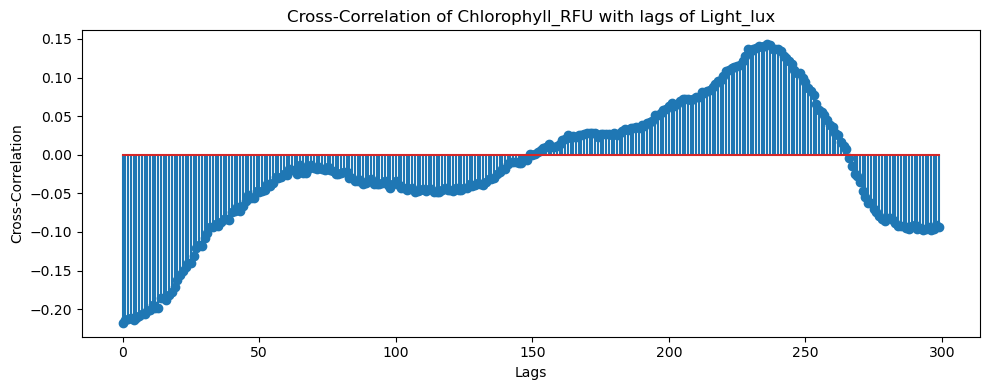

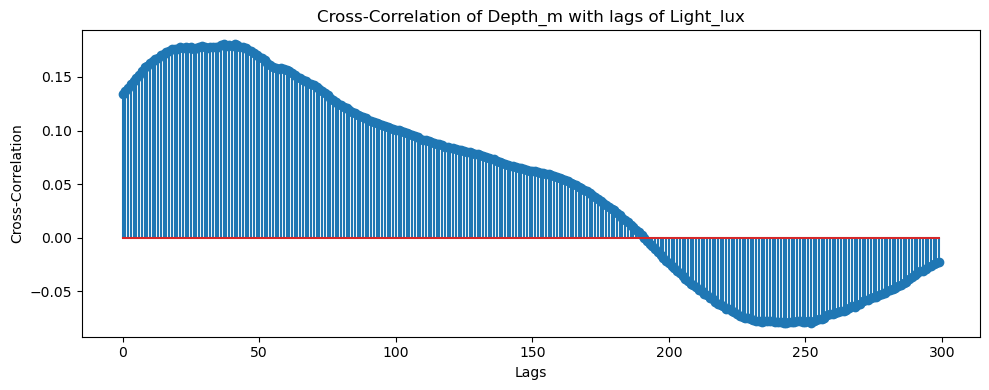

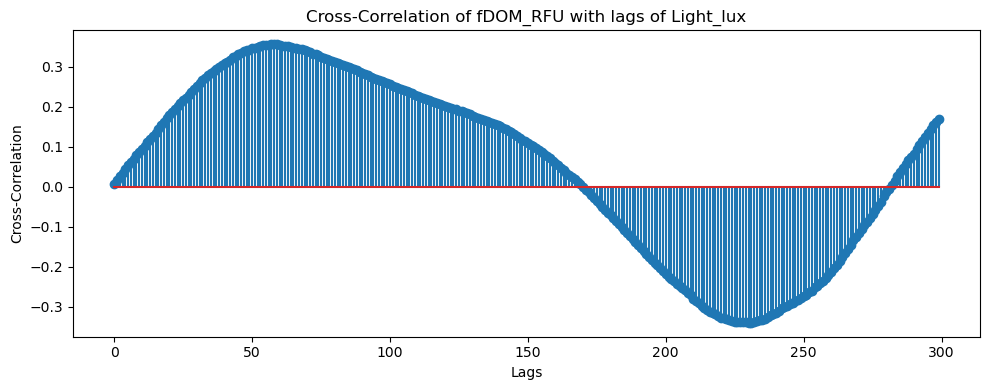

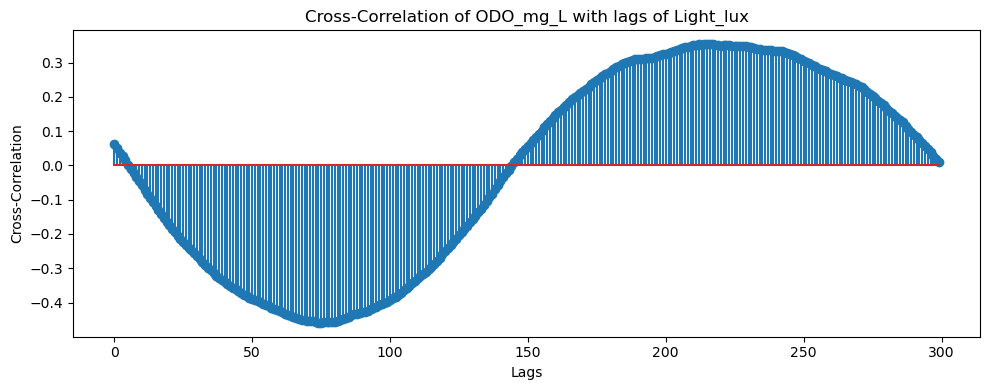

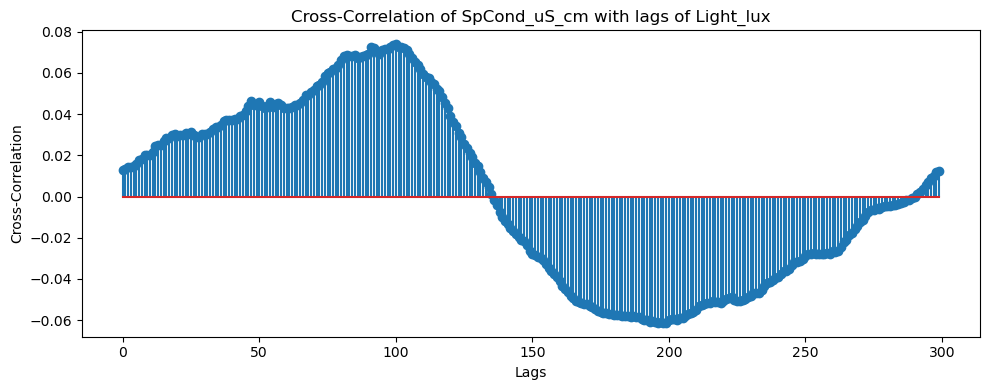

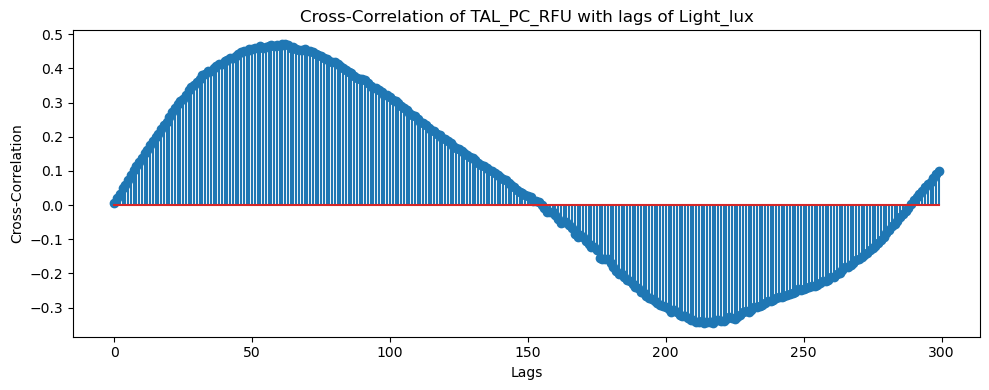

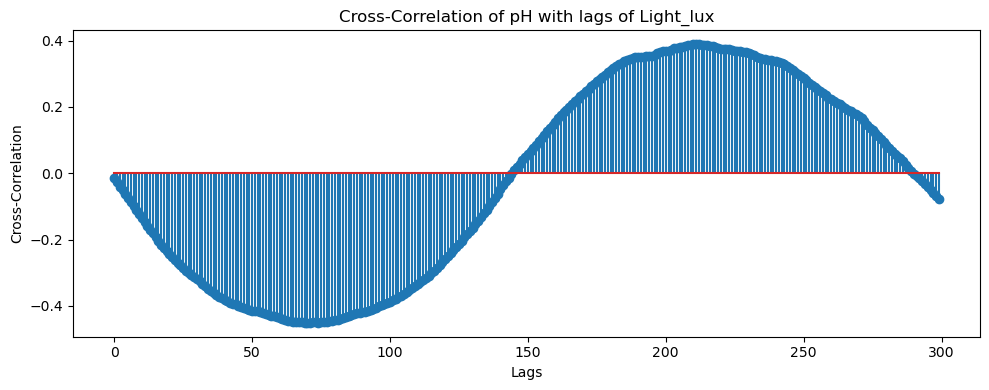

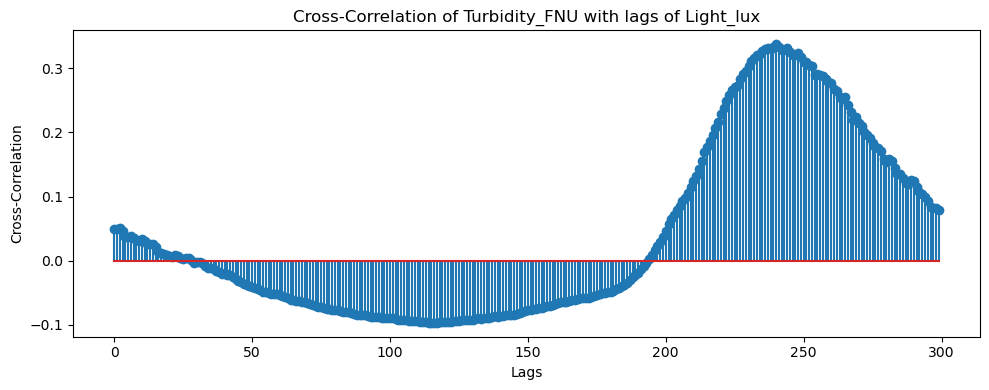

In [6]:
from statsmodels.tsa.stattools import ccf
import numpy as np

# Function to plot cross-correlation coefficients for different lags
def plot_cross_correlation(data, x, y, max_lag=300):
    # Compute the cross-correlation coefficients
    cross_corr = ccf(data[x], data[y], adjusted=False)[:max_lag]
    lags = np.arange(0, max_lag)
    
    # Plot the cross-correlation coefficients
    plt.figure(figsize=(10, 4))
    plt.stem(lags, cross_corr)
    plt.xlabel('Lags')
    plt.ylabel('Cross-Correlation')
    plt.title(f'Cross-Correlation of {y} with lags of {x}')
    plt.tight_layout()
    return plt

# Directory to save the cross-correlation plots
# cc_plot_dir = 'cross_correlation_plots'
# os.makedirs(cc_plot_dir, exist_ok=True)

# Calculate and save the cross-correlation plots
cc_plot_paths = []
for var in variables:
    plt = plot_cross_correlation(data, 'Light_lux', var)
    # cc_plot_file_name = f"{var}_cross_correlation.png"
    # cc_plot_path = os.path.join(cc_plot_dir, cc_plot_file_name)
    # plt.savefig(cc_plot_path)
    plt.show()
    # plt.close()
    # cc_plot_paths.append(cc_plot_path)

# cc_plot_paths
